In [1]:
import pandas as pd

# CSV 파일 읽기
qwen1 = pd.read_csv('../data/train_qwen_1.csv')
qwen2 = pd.read_csv('../data/train_qwen_2.csv')


In [2]:
import pandas as pd
import ast


def extract_answer(text):
    try:
        # 텍스트 뒤에서부터 '{'와 '}'의 위치를 찾음
        start_idx = text.rfind('{')
        end_idx = text.rfind('}')
        
        # 유효한 중괄호 범위가 있는지 확인
        if start_idx != -1 and end_idx != -1 and start_idx < end_idx:
            dict_str = text[start_idx : end_idx+1]
            # 딕셔너리로 변환
            data = ast.literal_eval(dict_str)
            if isinstance(data, dict) and '정답' in data:
                return data['정답']
            elif isinstance(data, dict) and 'Answer' in data:
                return data['Answer']
                
    except (ValueError, SyntaxError):
        # {...}를 찾지 못했다면 None 반환
        return None
        
    return None


In [3]:
qwen1_answer = qwen1.copy()
qwen2_answer = qwen2.copy()

target_cols = ['output_0', 'output_1', 'output_2']

In [4]:
def make_answer_csv(df,target_cols):
    for col in target_cols:
        if col in df.columns:
            df[col] = df[col].apply(extract_answer)


In [5]:
make_answer_csv(qwen1_answer, target_cols)
make_answer_csv(qwen2_answer, target_cols)


In [6]:
qwen1_answer.head()

,id,output_0,output_1,output_2
0,generation-for-nlp-0,None,4,4
1,generation-for-nlp-1,None,None,1
2,generation-for-nlp-2,4,4,4
3,generation-for-nlp-3,2,2,None
4,generation-for-nlp-4,None,2,None


In [7]:
# target_cols = ['output_0', 'output_1', 'output_2']
none_counts_1 = qwen1_answer[['output_0', 'output_1', 'output_2']].isnull().sum()
none_counts_2 = qwen2_answer[['output_0', 'output_1', 'output_2']].isnull().sum()


print("--- 컬럼별 None 개수(qwen_1) ---")
print(none_counts_1)

print("--- 컬럼별 None 개수(qwen_2) ---")
print(none_counts_2)

--- 컬럼별 None 개수(qwen_1) ---
output_0    69
output_1    76
output_2    74
dtype: int64
--- 컬럼별 None 개수(qwen_2) ---
output_0    45
output_1    51
output_2    49
dtype: int64


In [8]:
qwen1_answer['none_count'] = qwen1_answer[['output_0', 'output_1', 'output_2']].isnull().sum(axis=1)
qwen2_answer['none_count'] = qwen2_answer[['output_0', 'output_1', 'output_2']].isnull().sum(axis=1)

qwen1_answer.head()

,id,output_0,output_1,output_2,none_count
0,generation-for-nlp-0,None,4,4,1
1,generation-for-nlp-1,None,None,1,2
2,generation-for-nlp-2,4,4,4,0
3,generation-for-nlp-3,2,2,None,1
4,generation-for-nlp-4,None,2,None,2


In [9]:
train_with_category = pd.read_csv('../data/train_with_category.csv')
train_with_category.head()

,id,paragraph,question,choices,answer,question_plus,category
0,generation-for-nlp-425,"상소하여 아뢰기를 , “신이 좌참 찬 송준길이 올린 차자를 보았는데 , 상복(喪服)...",상소한 인물이 속한 붕당에 대한 설명으로 옳은 것만을 모두 고르면?,"['ㄱ, ㄴ', 'ㄱ, ㄷ', 'ㄴ, ㄹ', 'ㄷ, ㄹ']",2,NaN,한국사
1,generation-for-nlp-426,"(가)은/는 의병계열과 애국계몽 운동 계열의 비밀결사가 모여 결성된 조직으로, 총사...",(가)에 대한 설명으로 옳지 않은 것은?,"['고려 문종 때에 남경(南京)으로 승격되었다.', '종루(鐘樓), 이현, 칠패 등...",1,NaN,한국사
2,generation-for-nlp-427,나는 삼한(三韓) 산천의 음덕을 입어 대업을 이루었다.(가)는/은 수덕(水德)이 순...,(가) 지역에 대한 설명으로 옳은 것은?,"['이곳에 대장도감을 설치하여 재조대장경을 만들었다.', '지눌이 이곳에서 수선사 ...",4,NaN,한국사
3,generation-for-nlp-428,이 날 소정방이 부총관 김인문 등과 함께 기 벌포에 도착하여 백제 군사와 마주쳤다....,밑줄 친 ‘그’에 대한 설명으로 옳은 것은?,"['살수에서 수의 군대를 물리쳤다 .', '김춘추 의 신라 왕위 계승을 지원하였다 ...",2,NaN,한국사
4,generation-for-nlp-429,"선비들 수만 명이 대궐 앞에 모여 만 동묘와 서원을 다시 설립할 것을 청하니, (가...",(가) 인물이 추진한 정책으로 옳지 않은 것은?,"['사창제를 실시하였다 .', '대전회통을 편찬하였다 .', '비변사의 기능을 강화...",3,NaN,한국사


In [10]:
category = train_with_category[['id','answer', 'category']]
category.head()

,id,answer,category
0,generation-for-nlp-425,2,한국사
1,generation-for-nlp-426,1,한국사
2,generation-for-nlp-427,4,한국사
3,generation-for-nlp-428,2,한국사
4,generation-for-nlp-429,3,한국사


In [11]:
import pandas as pd
from collections import Counter


def hard_voting(row):
    # 행에서 None이 아닌 값만 리스트로 추출
    valid_answers = [val for val in row if val is not None and pd.notna(val)]
    
    # 모든 값이 None이면 None 반환
    if not valid_answers:
        return None
    
    # 유효한 값이 있다면 가장 많이 등장한 값(최빈값) 추출
    # Counter를 사용하여 빈도수 계산
    counts = Counter(valid_answers)
    
    # most_common(1)[0][0]은 가장 빈도가 높은 첫 번째 요소의 값을 가져옴
    final_answer = counts.most_common(1)[0][0]
    
    return int(final_answer)

# 새로운 'final_output' 컬럼 생성
qwen2_answer['final_output'] = qwen2_answer[['output_0', 'output_1', 'output_2']].apply(hard_voting, axis=1)


In [12]:
qwen2_answer[['id', 'answer', 'category']] = category[['id', 'answer', 'category']]

In [14]:
qwen2_answer

,id,output_0,output_1,output_2,none_count,final_output,answer,category
0,generation-for-nlp-425,4,4,4,0,4.0,2,한국사
1,generation-for-nlp-426,1,1,1,0,1.0,1,한국사
2,generation-for-nlp-427,4,4,4,0,4.0,4,한국사
3,generation-for-nlp-428,2,2,2,0,2.0,2,한국사
4,generation-for-nlp-429,4,1,2,0,4.0,3,한국사
...,...,...,...,...,...,...,...,...
2026,generation-for-nlp-2893,1,1,1,0,1.0,1,사회
2027,generation-for-nlp-2894,4,4,4,0,4.0,4,교육산업
2028,generation-for-nlp-2895,1,1,1,0,1.0,1,부동산
2029,generation-for-nlp-2896,1,1,1,0,1.0,1,사회


In [15]:
qwen2_answer["is_correct"] = (qwen2_answer["final_output"] == qwen2_answer["answer"]).astype(int)


/var/folders/c4/h8vy6rfn1d121934ddzq3mvc0000gn/T/ipykernel_67052/4218733694.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


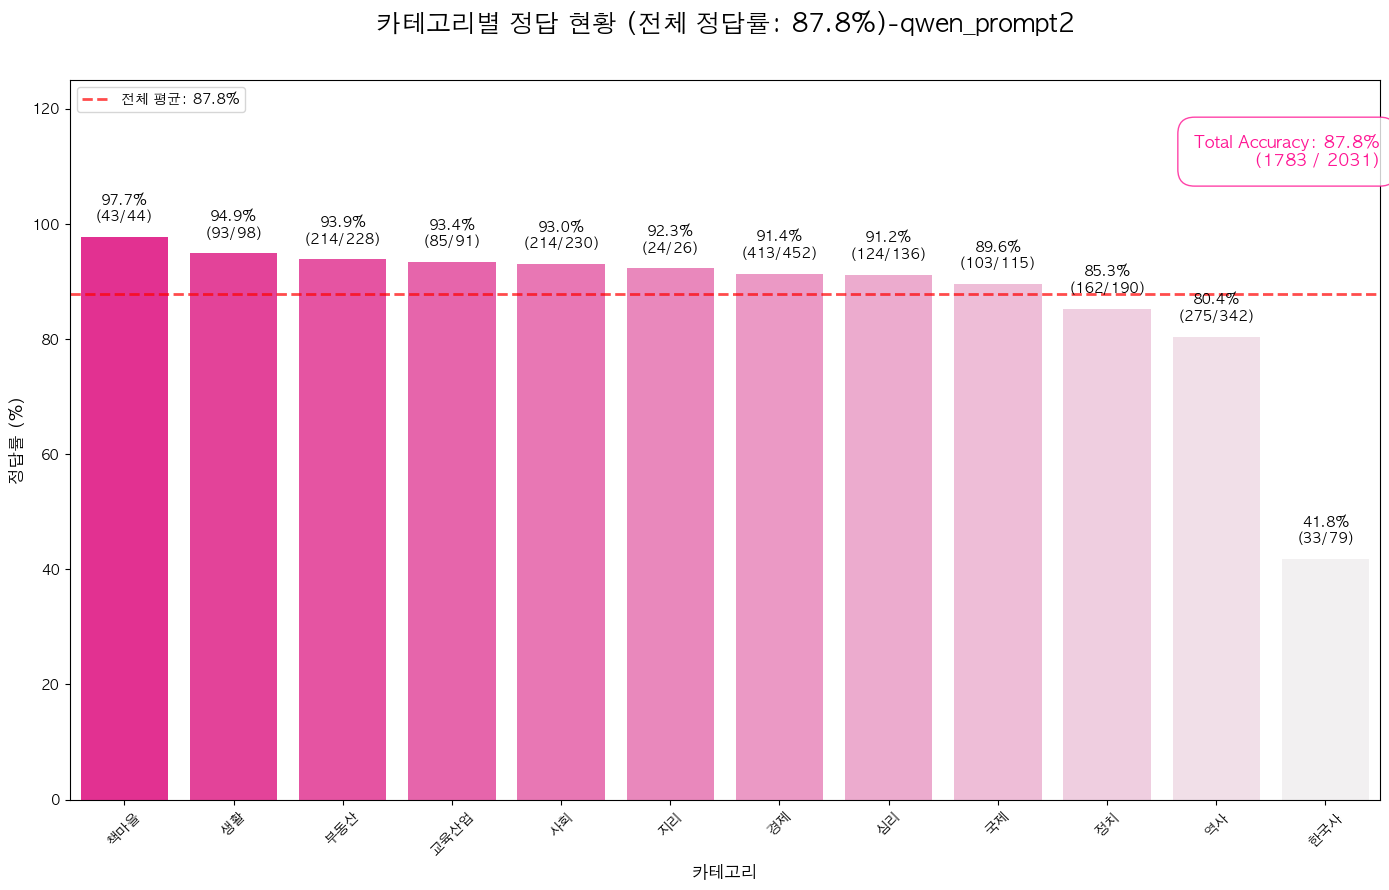

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib as mpl

mpl.rcParams["font.family"] = "AppleGothic"
mpl.rcParams["axes.unicode_minus"] = False

# 2. 데이터 집계 (정답률, 맞은 개수, 전체 개수)
qwen2_answer['is_correct'] = (qwen2_answer['final_output'] == qwen2_answer['answer'])
total_acc = qwen2_answer['is_correct'].mean() * 100  # 전체 정답률 계산
total_correct = qwen2_answer['is_correct'].sum()
total_count = len(qwen2_answer)

# 카테고리별 집계
acc_df = qwen2_answer.groupby('category')['is_correct'].agg(['mean', 'sum', 'count']).reset_index()
acc_df.columns = ['category', 'accuracy', 'correct_count', 'total_count']
acc_df['accuracy'] *= 100
acc_df = acc_df.sort_values(by='accuracy', ascending=False)

# 3. 시각화 설정
plt.figure(figsize=(14, 9))
pink_colors = sns.light_palette("deeppink", n_colors=len(acc_df), reverse=True)

# 막대 그래프
barplot = sns.barplot(
    x='category', 
    y='accuracy', 
    data=acc_df, 
    palette=pink_colors
)

# 4. 전체 정답률 평균선 추가
plt.axhline(total_acc, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'전체 평균: {total_acc:.1f}%')

# 5. 막대 위 개별 수치 표시 (정답률% + 맞은개수/전체개수)
for i, p in enumerate(barplot.patches):
    row = acc_df.iloc[i]
    display_text = f"{row['accuracy']:.1f}%\n({int(row['correct_count'])}/{int(row['total_count'])})"
    
    barplot.annotate(
        display_text,
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 20),
        textcoords='offset points',
        fontsize=10,
        fontweight='bold'
    )

# 6. 전체 정답률 요약 텍스트 상자 추가 (그래프 오른쪽 상단)
stats_text = f'Total Accuracy: {total_acc:.1f}%\n({total_correct} / {total_count})'
plt.text(len(acc_df)-0.5, 110, stats_text, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='deeppink', boxstyle='round,pad=1'),
         ha='right', fontsize=12, fontweight='bold', color='deeppink')

# 7. 스타일 마무리
plt.title(f'카테고리별 정답 현황 (전체 정답률: {total_acc:.1f}%)-qwen_prompt2', fontsize=18, pad=35)
plt.ylabel('정답률 (%)', fontsize=12)
plt.xlabel('카테고리', fontsize=12)
plt.ylim(0, 125)
plt.xticks(rotation=45)
plt.legend(loc='upper left') # 평균선 라벨 표시
plt.tight_layout()

plt.show()

In [17]:
ax40 = pd.read_csv('../data/ax40.csv')
ax40.head()

,id,paragraph,question,choices,answer,question_plus,output_0
0,generation-for-nlp-425,"상소하여 아뢰기를 , “신이 좌참 찬 송준길이 올린 차자를 보았는데 , 상복(喪服)...",상소한 인물이 속한 붕당에 대한 설명으로 옳은 것만을 모두 고르면?,"['ㄱ, ㄴ', 'ㄱ, ㄷ', 'ㄴ, ㄹ', 'ㄷ, ㄹ']",2,NaN,[Reasoning]\n\n### 단계 1: 제시문을 통해 상소한 인물의 붕당 파악...
1,generation-for-nlp-426,"(가)은/는 의병계열과 애국계몽 운동 계열의 비밀결사가 모여 결성된 조직으로, 총사...",(가)에 대한 설명으로 옳지 않은 것은?,"['고려 문종 때에 남경(南京)으로 승격되었다.', '종루(鐘樓), 이현, 칠패 등...",1,NaN,"[Reasoning]\n제시문 (가)는 ""의병계열과 애국계몽 운동 계열의 비밀결사가..."
2,generation-for-nlp-427,나는 삼한(三韓) 산천의 음덕을 입어 대업을 이루었다.(가)는/은 수덕(水德)이 순...,(가) 지역에 대한 설명으로 옳은 것은?,"['이곳에 대장도감을 설치하여 재조대장경을 만들었다.', '지눌이 이곳에서 수선사 ...",4,NaN,[Reasoning]\n\n제시문 분석을 통해 (가) 지역에 대한 정보를 추출해보겠...
3,generation-for-nlp-428,이 날 소정방이 부총관 김인문 등과 함께 기 벌포에 도착하여 백제 군사와 마주쳤다....,밑줄 친 ‘그’에 대한 설명으로 옳은 것은?,"['살수에서 수의 군대를 물리쳤다 .', '김춘추 의 신라 왕위 계승을 지원하였다 ...",2,NaN,[Reasoning]\n- **단계 1: '그'의 정체 파악**\n 제시문에 등장...
4,generation-for-nlp-429,"선비들 수만 명이 대궐 앞에 모여 만 동묘와 서원을 다시 설립할 것을 청하니, (가...",(가) 인물이 추진한 정책으로 옳지 않은 것은?,"['사창제를 실시하였다 .', '대전회통을 편찬하였다 .', '비변사의 기능을 강화...",3,NaN,[Reasoning]\n- 단계 1: 제시문에서 (가) 인물이 누구인지 파악하기\n...


In [18]:
ax40_answer = ax40[['id', 'answer', 'output_0']].copy()

In [19]:
make_answer_csv(ax40_answer, ['output_0'])

In [20]:
ax40_answer['category'] = category['category'].values
ax40_answer.head()

,id,answer,output_0,category
0,generation-for-nlp-425,2,3,한국사
1,generation-for-nlp-426,1,1,한국사
2,generation-for-nlp-427,4,4,한국사
3,generation-for-nlp-428,2,2,한국사
4,generation-for-nlp-429,3,3,한국사


In [21]:
# a.x 4.0이 정답을 "1, 3"과 같이 중복으로 대답했을 경우, 0으로 수정(오답처리)
ax40_answer.loc[
    ax40_answer["output_0"].astype(str).str.contains(","),
    "output_0"
] = "0"

/var/folders/c4/h8vy6rfn1d121934ddzq3mvc0000gn/T/ipykernel_67052/594666256.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


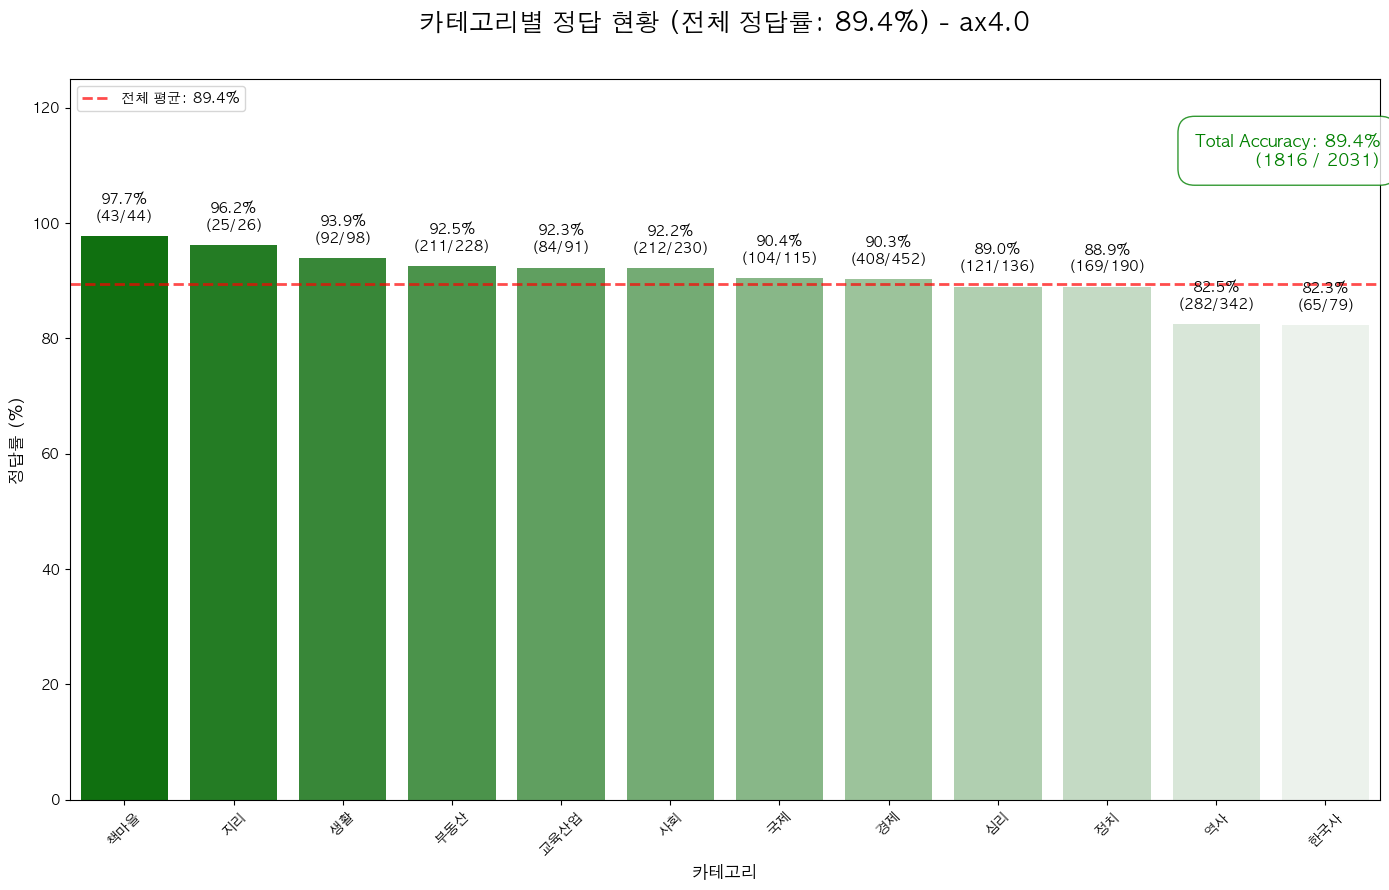

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams["font.family"] = "AppleGothic"
mpl.rcParams["axes.unicode_minus"] = False

# 2. 데이터 집계
ax40_answer['is_correct'] = (ax40_answer['output_0'].astype(int) == ax40_answer['answer'])
total_acc = ax40_answer['is_correct'].mean() * 100  # 전체 정답률 계산
total_correct = ax40_answer['is_correct'].sum()
total_count = len(ax40_answer)

# 카테고리별 집계
acc_df = ax40_answer.groupby('category')['is_correct'].agg(['mean', 'sum', 'count']).reset_index()
acc_df.columns = ['category', 'accuracy', 'correct_count', 'total_count']
acc_df['accuracy'] *= 100
acc_df = acc_df.sort_values(by='accuracy', ascending=False)

# 3. 시각화 설정
plt.figure(figsize=(14, 9))
pink_colors = sns.light_palette("green", n_colors=len(acc_df), reverse=True)

# 막대 그래프
barplot = sns.barplot(
    x='category', 
    y='accuracy', 
    data=acc_df, 
    palette=pink_colors
)

# 4. 전체 정답률 평균선 추가
plt.axhline(total_acc, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'전체 평균: {total_acc:.1f}%')

# 5. 막대 위 개별 수치 표시 (정답률% + 맞은개수/전체개수)
for i, p in enumerate(barplot.patches):
    row = acc_df.iloc[i]
    display_text = f"{row['accuracy']:.1f}%\n({int(row['correct_count'])}/{int(row['total_count'])})"
    
    barplot.annotate(
        display_text,
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 20),
        textcoords='offset points',
        fontsize=10,
        fontweight='bold'
    )

# 6. 전체 정답률 요약 텍스트 상자 추가 (그래프 오른쪽 상단)
stats_text = f'Total Accuracy: {total_acc:.1f}%\n({total_correct} / {total_count})'
plt.text(len(acc_df)-0.5, 110, stats_text, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='green', boxstyle='round,pad=1'),
         ha='right', fontsize=12, fontweight='bold', color='green')

# 7. 스타일 마무리
plt.title(f'카테고리별 정답 현황 (전체 정답률: {total_acc:.1f}%) - ax4.0', fontsize=18, pad=35)
plt.ylabel('정답률 (%)', fontsize=12)
plt.xlabel('카테고리', fontsize=12)
plt.ylim(0, 125)
plt.xticks(rotation=45)
plt.legend(loc='upper left') # 평균선 라벨 표시
plt.tight_layout()

plt.show()